In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../img/style.mplstyle')


In [14]:
scratch_base = '/pscratch/sd/j/jrobnik/'
scratch = scratch_base + 'quasars_scratch/'
dir_data = scratch_base + 'quasars/'
dir_results = 'data/'

ids = np.load(dir_data + 'ids.npy')

print(np.argmin(np.abs(ids-370319)))
ids[25285]

25285


370319

In [2]:
data = pd.read_csv('../data/real_0.csv')#.sort_values('logB', ascending=False)
#data2 = pd.read_csv('../data/real_randomized.csv')


In [6]:
success = np.array(data['opt_success'] & data['quad_success'])
np.sum(success)

29522

In [3]:
data = data.sort_values('logB', ascending= False)
display(data)

,logB,log_lik_ratio,white_periodogram,cycles,period,sigma,tau,A_const,A_sin,A_cos,opt_success,quad_success,data_points,log_prior_odds,id
13997,28.008220,20.589590,79282.411750,4.785217,291.951536,0.404445,4.243315,19.122720,1.061551,0.150491,True,True,116,0.902312,366226
18989,26.411580,36.115200,701.148218,2.145789,644.612029,0.108759,0.893272,19.807833,-0.024083,0.115689,True,True,402,0.865781,263798
28494,23.896879,41.458954,762.703982,2.151729,672.461840,0.070448,1.227704,19.759194,0.103900,-0.073573,True,True,234,1.031004,316958
456,22.692397,27.983853,499.342274,2.191961,660.140815,0.134961,1.522317,20.261716,-0.140253,0.009070,True,True,370,1.031124,304690
11485,22.233839,29.439037,478.611715,2.118093,683.170584,0.098069,1.522594,20.177484,-0.050697,-0.078000,True,True,445,1.031165,294564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24190,NaN,NaN,47.499159,2.344819,589.885327,inf,0.000000,0.000000,0.000000,0.000000,False,True,237,0.865708,271607
28901,NaN,NaN,56.853075,2.343787,508.914155,inf,0.000000,0.000000,0.000000,0.000000,False,True,86,0.322716,47122
29442,NaN,NaN,33.975131,2.341458,486.033029,inf,0.000000,0.000000,0.000000,0.000000,False,True,112,0.150394,57870
30215,NaN,NaN,57.991309,2.340662,499.842077,inf,0.000000,0.000000,0.000000,0.000000,False,True,52,0.251870,377133


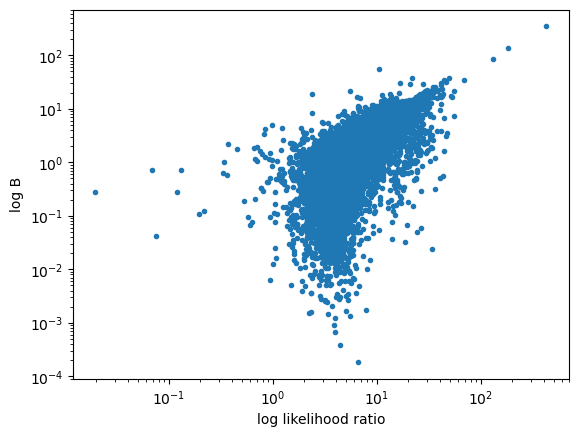

In [6]:
mask = np.isfinite(data['logB']) & (data['logB'] > 0.) & (data['log_lik_ratio'] > 0.)
plt.plot(np.array(data['log_lik_ratio'])[mask], np.array(data['logB'])[mask], '.')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('log likelihood ratio')
plt.ylabel('log B')

plt.show()

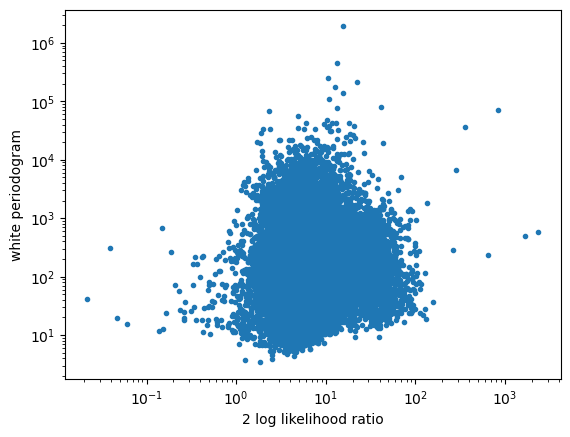

In [5]:
mask = (data['log_lik_ratio'] > 0.)
plt.plot(2 * np.array(data['log_lik_ratio'])[mask], np.array(data['white_periodogram'])[mask], '.')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('2 log likelihood ratio')
plt.ylabel('white periodogram')
plt.show()

In [ ]:
mask = (data['log_lik_ratio'] > 0.)
plt.plot(np.array(data['logB'])[mask], np.array(data['num_data'])[mask], '.')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('2 log likelihood ratio')
plt.ylabel('white periodogram')
plt.show()

In [ ]:
def find_twin():
    
    

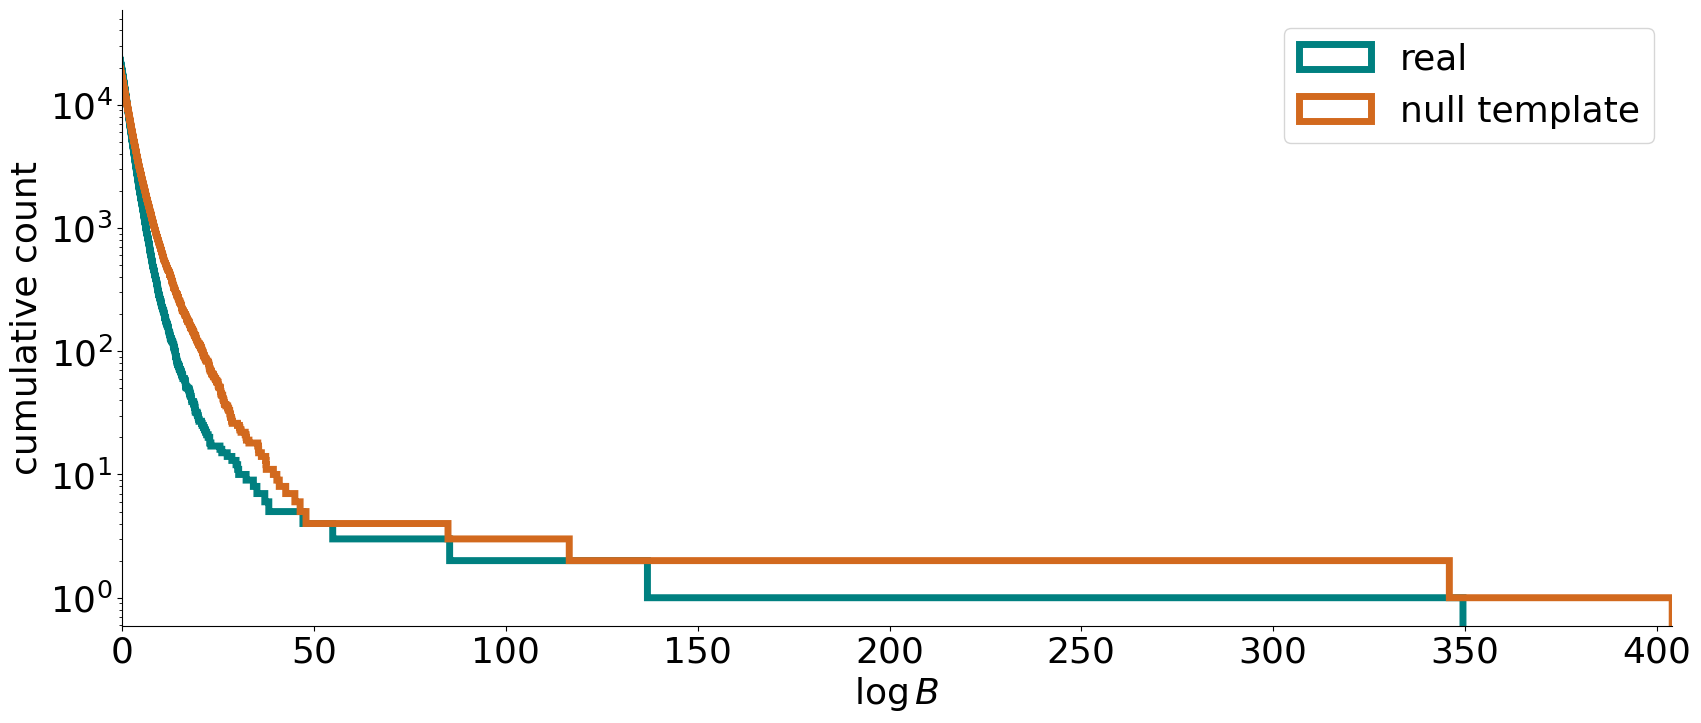

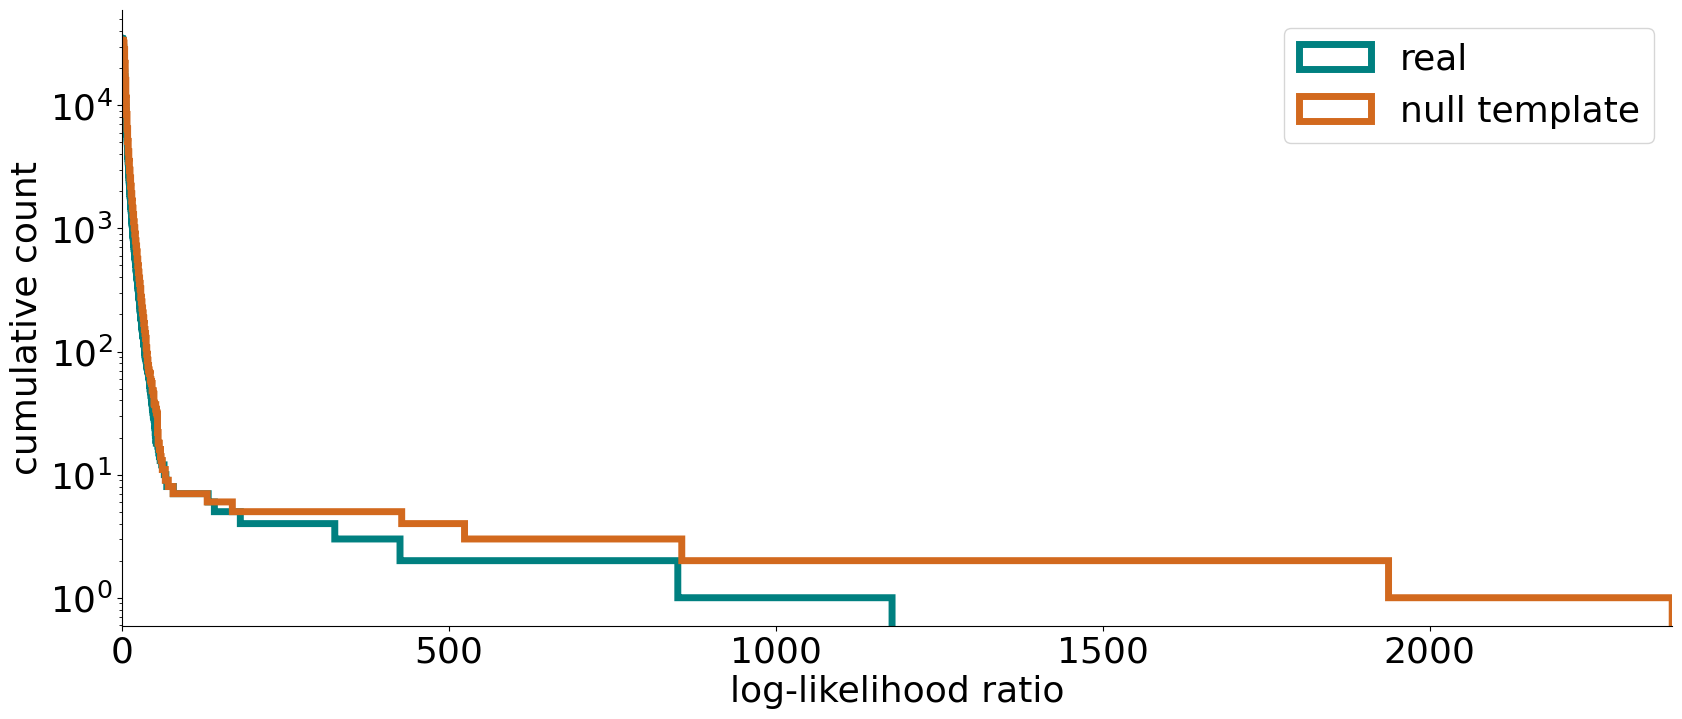

In [11]:


for istat in range(2):
    plt.figure(figsize= (20, 8))
    ff = 26
    plt.yticks(fontsize=ff)
    plt.xticks(fontsize=ff)

    stat = ['logB', 'log_lik_ratio'][istat]
    xlabel = [r'$\log B$', 'log-likelihood ratio'][istat]  
    save_name = '../img/results' + ['', '_loglik'][istat]  
    
    for imode in range(2):
        df = [data, data2][imode]
        name = ['real', 'null template'][imode]
        #color = ['tab:blue', 'tab:red'][imode]
    
        x = np.array(df[stat])
        x = x[np.isfinite(x)]
        plt.hist(x, cumulative= -1, histtype= 'step', bins = len(df), label= name, lw= 5)
    
    plt.xlim(0, np.max(x))
    plt.legend(fontsize= ff)
    plt.xlabel(xlabel, fontsize = ff)
    plt.ylabel('cumulative count', fontsize= ff)
    plt.yscale('log')
    plt.savefig(save_name)
    plt.show()

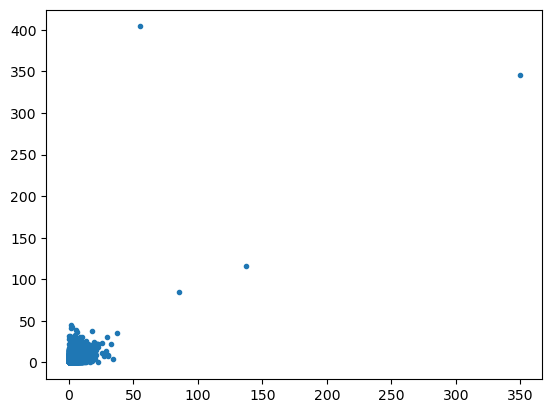

In [4]:
# are the same quasars detected on null and periodic?

data_both = data.merge(data2, on= 'id')
mask = np.isfinite(data_both['logB_x']) & np.isfinite(data_both['logB_y']) & (data_both['logB_x'] > 0) & (data_both['logB_y'] > 0)
plt.plot(np.array(data_both['logB_x'])[mask], np.array(data_both['logB_y'])[mask], '.')

In [9]:


def inverse_permutation(perm):
    inv = np.empty(len(perm), dtype = int)
    inv[perm] = np.arange(len(perm), dtype= int)
    return inv

def assign_order(a):
    perm = np.argsort(a)
    inv_perm = inverse_permutation(perm)
    return np.arange(len(a), dtype= int)[inv_perm] # we asgin order to the sorted array and then apply the inverse permutation


# previous analysis
known = pd.read_csv('known.csv')
known_ids = np.array(known['id'], dtype = int)
known = known.rename(columns= {'period': 'period_known'})
print(len(known))
# my analysis
df = pd.read_csv('../data/real.csv')
df = df.loc[df['cycles'] > 1.5]
stat = 'white_periodogram'
df['order'] = assign_order(-np.array(df[stat]))
display(df.sort_values('white_periodogram', ascending=False))
get_known = lambda df: df[df['id'].isin(known_ids)]
df_known = get_known(df)
df_known = df_known.merge(known, on = 'id')
df_known

33


,logB,log_lik_ratio,white_periodogram,cycles,period,sigma,tau,A_const,A_sin,A_cos,id,data_points,order
13394,3.496091,7.719055,1.916794e+06,24.816940,54.449821,0.426895,109.048921,16.042314,-0.152302,-0.010449,253736,135,0
19443,9.529915,6.654702,4.524225e+05,3.245792,217.535930,0.315659,5.529851,16.793085,-0.634284,-0.346134,369125,51,1
14773,2.575149,5.261369,2.487050e+05,2.862530,447.051214,0.136487,489.507738,17.723471,-0.068357,0.058380,19827,442,2
10367,18.009083,11.119141,2.155139e+05,1.604017,673.894770,0.473546,8.389614,18.447813,0.170960,0.961847,243157,128,3
15453,4.689848,6.327485,1.760491e+05,16.105181,54.627532,0.472624,24.531879,17.510603,0.322496,0.174789,379533,70,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161,-2.078494,1.264822,4.598936e+00,15.095693,67.041895,0.095485,24.965513,19.972202,0.063620,-0.015415,180195,59,35349
29887,-1.088370,2.232314,4.379739e+00,6.407540,131.695794,0.086791,193.945562,20.761925,-0.013464,-0.062632,408876,50,35350
26447,-1.298112,1.266638,3.920668e+00,8.150193,135.835584,0.091853,113.189400,20.889526,0.025580,-0.079711,413424,51,35351
15001,-0.544767,0.621004,3.682162e+00,5.573167,89.653948,0.095821,4.171028,19.974710,-0.030271,-0.012454,392510,65,35352


,logB,log_lik_ratio,white_periodogram,cycles,period,sigma,tau,A_const,A_sin,A_cos,id,data_points,order,period_known
0,6.746577,9.074284,1512.074272,3.724747,338.472629,0.123908,18.237021,19.917008,-0.464778,-0.106898,411886,53,1656,337.4
1,3.169108,5.250575,607.743395,4.556951,302.231867,0.092868,89.179359,20.160969,0.060274,-0.225959,280226,56,4777,301.3
2,1.647674,3.340010,1241.649908,3.722457,318.313995,0.109802,93.041619,19.842420,-0.105336,0.168453,385828,67,2138,316.7
3,5.903955,7.412409,608.374942,13.756306,80.974328,0.150431,197.890523,20.768519,0.157982,-0.060214,136743,59,4773,308.0
4,4.179249,6.654374,4870.749249,2.311416,505.195731,0.083857,117.296108,18.225065,0.083871,-0.151629,299195,60,337,509.4
5,0.731651,5.775784,1457.800464,21.424003,55.310930,0.120867,176.186938,19.567371,0.046130,0.013165,386135,75,1745,456.0
6,2.768293,6.753650,1817.272579,1.731913,457.880525,0.081502,437.314722,19.010342,0.140423,0.157284,410634,53,1311,467.3
7,4.832324,6.358427,1944.585943,1.852276,626.741884,0.109764,198.126471,19.370809,0.060508,0.243710,336650,66,1195,309.7
8,8.164355,5.855961,3014.827866,2.630790,422.715115,0.139511,72.079129,20.092759,0.191938,0.488077,343421,53,666,429.2
9,0.586792,2.858505,1329.087653,2.373169,500.560404,0.088921,259.938642,19.438407,0.138416,-0.063594,424734,52,1955,486.3
